In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
matplotlib.style.use('ggplot')
from IPython.display import display, Image
from pandas.tools.plotting import table
import PIL
import cStringIO
import urllib
import pandas as pd

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Import Data

In [2]:
type_color = pd.read_csv('data/color_type.csv')
data_poke = pd.read_csv('data/pokemonGO.csv')

### Data Sample

In [3]:
data_poke[:5]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


# Pokemon Type

In [4]:
group_type = data_poke[['Type 1','Pokemon No.']].groupby(['Type 1']).count()

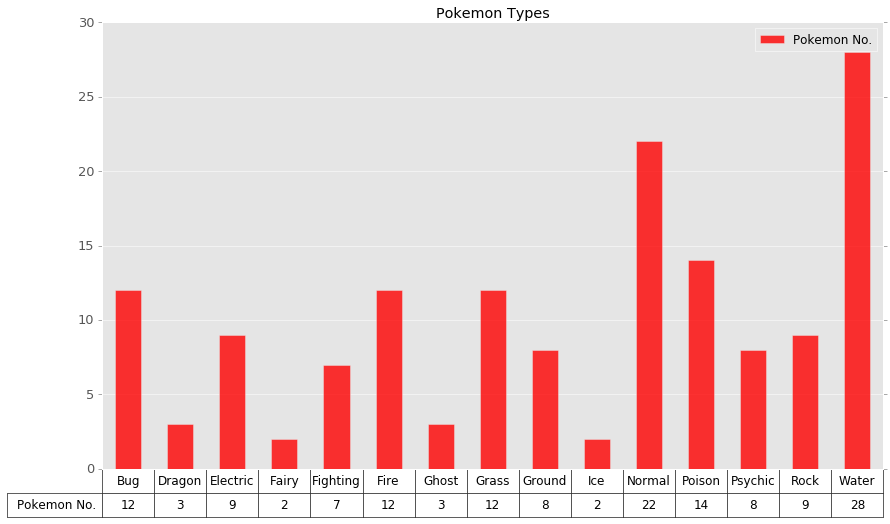

In [5]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False) 
tabla = table(ax,group_type.transpose(),cellLoc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.set_visible(True)
ax.add_table(tabla)
group_type.plot(ax = ax,kind='bar',color='red',figsize=(14,8),fontsize=13,title='Pokemon Types',sort_columns=True,alpha=0.8)

In [ ]:
# Box Plot [MAX CP and MAX HP]

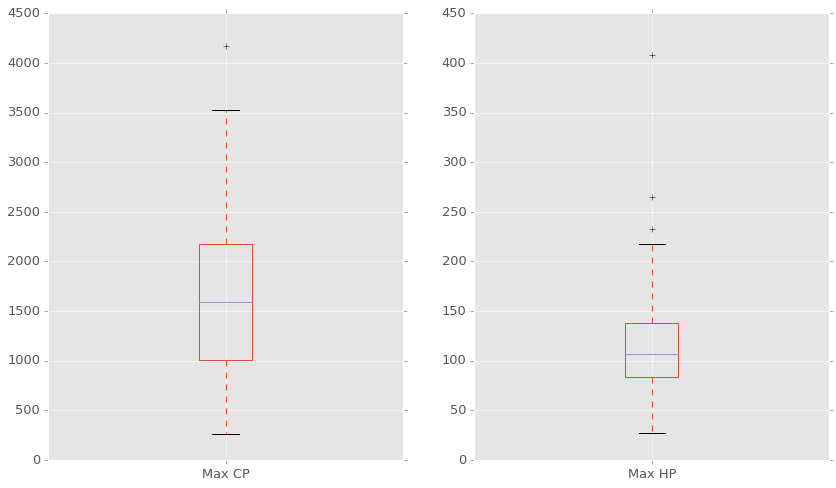

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)#,#figsize=(18, 2))
data_poke[['Max CP']].plot(kind='box',figsize=(14,8),fontsize=13,ax=ax1)
data_poke[['Max HP']].plot(kind='box',figsize=(14,8),fontsize=13,ax=ax2)

# Scatter Plot

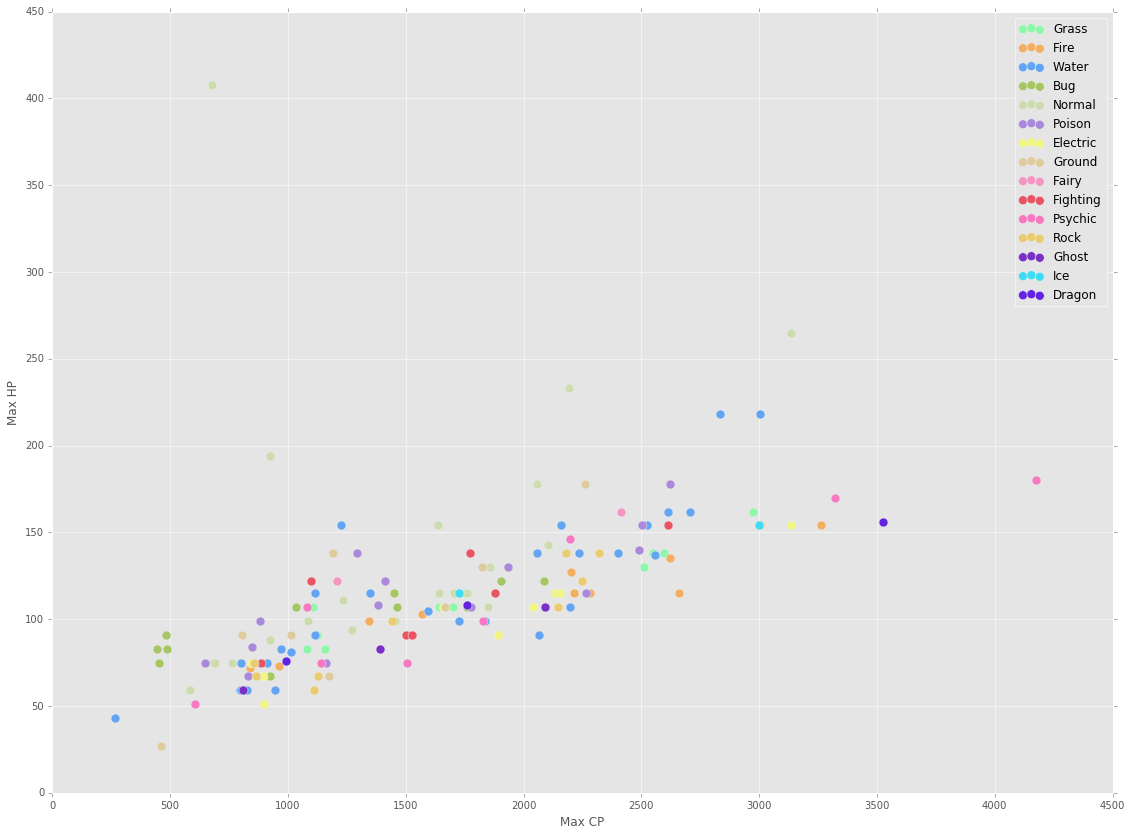

In [7]:
fig, ax = plt.subplots(1, 1)
for tipo,color in type_color.values:
    data_poke[data_poke['Type 1']==tipo].plot(ax=ax,kind='scatter', x='Max CP', y='Max HP',figsize=(19,14),label = tipo, 
                                              color ='#'+color,s=80 ); 

# TOP 5 MAX CP

In [8]:
def generaImg(x):
    images_cs = [ cStringIO.StringIO(urllib.urlopen(f).read()) for f in [x['Image URL']] ]
    images = [PIL.Image.open(f) for f in images_cs ]
    return images[0]

In [9]:
top5_CP = data_poke.sort_values('Max CP',ascending = False)[:5]
top5_CP['img'] = top5_CP.apply(lambda x: generaImg(x),axis = 1)

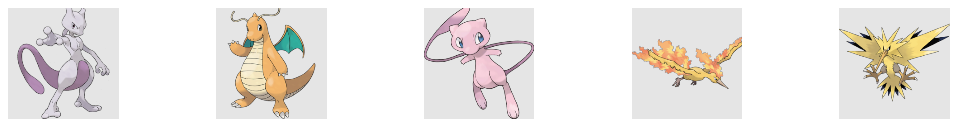

In [10]:
imagenes = top5_CP.img.tolist()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(18, 2))
for cont in range(1,6):
    eval("ax"+str(cont)+".get_xaxis().set_visible(False)")
    eval('ax'+str(cont)+'.get_yaxis().set_visible(False)')
    eval('ax'+str(cont)+'.imshow(imagenes['+str(cont-1)+'])')


# BOTTOM 5 MAX CP

In [11]:
Bottom5_CP = data_poke.sort_values('Max CP',ascending = False)[-5:]
Bottom5_CP['img'] = Bottom5_CP.apply(lambda x: generaImg(x),axis = 1)

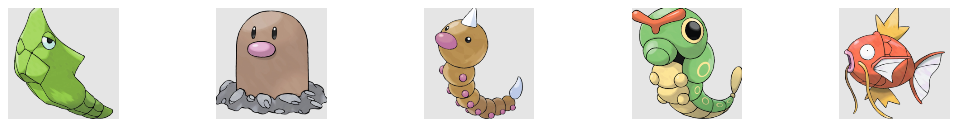

In [12]:
imagenes = Bottom5_CP.img.tolist()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(18, 2))
for cont in range(1,6):
    eval("ax"+str(cont)+".get_xaxis().set_visible(False)")
    eval('ax'+str(cont)+'.get_yaxis().set_visible(False)')
    eval('ax'+str(cont)+'.imshow(imagenes['+str(cont-1)+'])')

# TOP 5 MAX HP

In [14]:
top5_HP = data_poke.sort_values('Max HP',ascending = False)[:5]
top5_HP['img'] = top5_HP.apply(lambda x: generaImg(x),axis = 1)

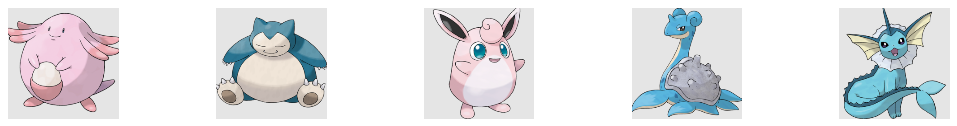

In [15]:
imagenes = top5_HP.img.tolist()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(18, 2))
for cont in range(1,6):
    eval("ax"+str(cont)+".get_xaxis().set_visible(False)")
    eval('ax'+str(cont)+'.get_yaxis().set_visible(False)')
    eval('ax'+str(cont)+'.imshow(imagenes['+str(cont-1)+'])')

# BOTTOM 5 MAX HP

In [16]:
bottom5_HP = data_poke.sort_values('Max HP',ascending = False)[-5:]
bottom5_HP['img'] = bottom5_HP.apply(lambda x: generaImg(x),axis = 1)

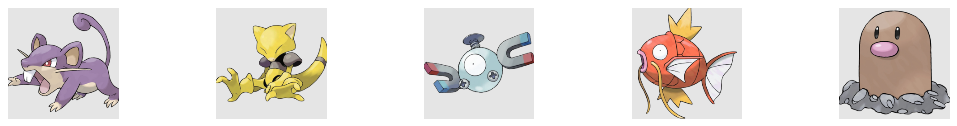

In [17]:
imagenes = bottom5_HP.img.tolist()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(18, 2))
for cont in range(1,6):
    eval("ax"+str(cont)+".get_xaxis().set_visible(False)")
    eval('ax'+str(cont)+'.get_yaxis().set_visible(False)')
    eval('ax'+str(cont)+'.imshow(imagenes['+str(cont-1)+'])')